In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import glob
import os
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, roc_auc_score
#from tikzplotlib import save

## Deep ensembles

In [2]:
def read_files(path_name):
    values = []
    files = sorted(glob.glob(os.path.join(path_name+'/*.npy'), recursive=True))
    for filename in files:
        try:
            vals = np.load(filename)
            values.append(vals[0])
        except Exception as e:
            pass
    return np.asarray(values)


def calculate_auc_roc(id_values, ood_values, is_prob):
    if is_prob:
        id_values = np.reshape(1-id_values, (-1, 1))
        ood_values = np.reshape(1-ood_values, (-1, 1))
    else:
        id_values = np.reshape(id_values, (-1, 1))
        ood_values = np.reshape(ood_values, (-1, 1))
        id_values = id_values
        ood_values = ood_values
    y = [0]*len(id_values)+[1]*len(ood_values)
    x = np.vstack((id_values, ood_values))
    roc_outputs = roc_curve(y, x)
    fpr, tpr = roc_outputs[0], roc_outputs[1]
    tholds = roc_outputs[2]
    auc_value = auc(fpr, tpr)
    return [auc_value, fpr, tpr, tholds]

def main(id_path, ood_path, is_prob=True):
    auroc = {}
    #for idx in ['1', '5', '10','15', '20']:
    for idx in ['10']:
        print(idx)
        path = id_path+'/'+idx
        print(path)
        id_values = read_files(path)
        print(np.min(id_values))
        #print(id_values.shape)
        path = ood_path+'/'+idx
        print(path)
        ood_values = read_files(path)
        outputs = calculate_auc_roc(id_values, ood_values, is_prob)
        auroc[int(idx)] = outputs
    return auroc
def get_optimal_threshold_value(auroc, key, is_prob):
    auc, fpr, tpr, thodls = auroc[key]
    if is_prob:
        thodls = thodls[::-1]
    gmeans = np.sqrt(tpr * (1-fpr))
    small_index = np.argmax(gmeans)
    print('Max Geo-means score: ', gmeans[small_index])
    return small_index, thodls[small_index]
    
def plot_roc_curves(auroc, key=10, is_prob=True):
    opt_index, thold = get_optimal_threshold_value(auroc, key, is_prob)
    plt.figure(figsize=(10, 10))
    for key, value in auroc.items():
        lbl = 'Ensemble: '+str(key)+', AUROC: '+str(np.round(value[0], 5))
        plt.plot(value[1], value[2], label=lbl, linewidth=2)
        #print('Ensemble: ', key,' ::::: Tholds: ', value[3])
        plt.scatter(value[1][opt_index], value[2][opt_index])
    plt.legend()
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    #save('Entropy_sem3dVs3dis_AUROC.tex')
    #plt.savefig('ensemble_probability_sem3dvs3dis_AUROC.pdf', dpi=600)
    plt.show()
    print('Optimal threshold: ', thold, opt_index)

### Probability score - Deep Ensembles

In [3]:
ent_id_path ='./entropy_val/entropies/sem3d'
ent_ood_path = './entropy_val/entropies/s3dis'

id_path = './sem3d'
ood_path = './s3dis'

10
./sem3d/10
0.1744384765625
./s3dis/10
Max Geo-means score:  0.817566338732501


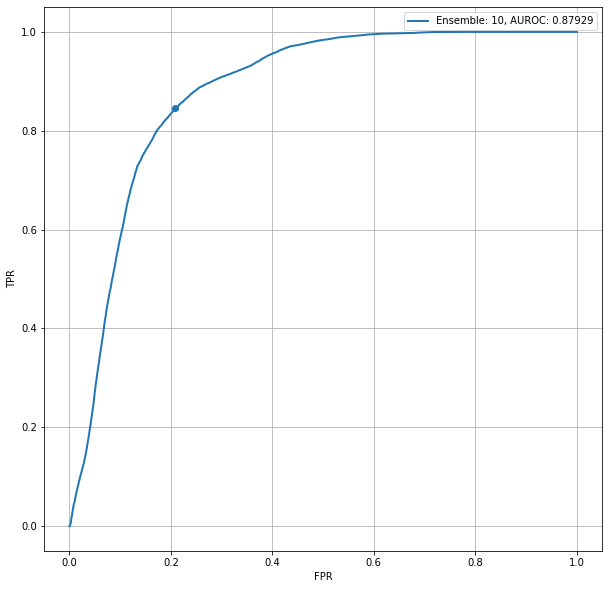

Optimal threshold:  0.7550048828125 2084


In [4]:
auroc = main(id_path, ood_path)
plot_roc_curves(auroc)

### Entropy score - Deep Ensembles

10
./entropy_val/entropies/sem3d/10
1.1563301086425781e-05
./entropy_val/entropies/s3dis/10
Max Geo-means score:  0.8156227770855407


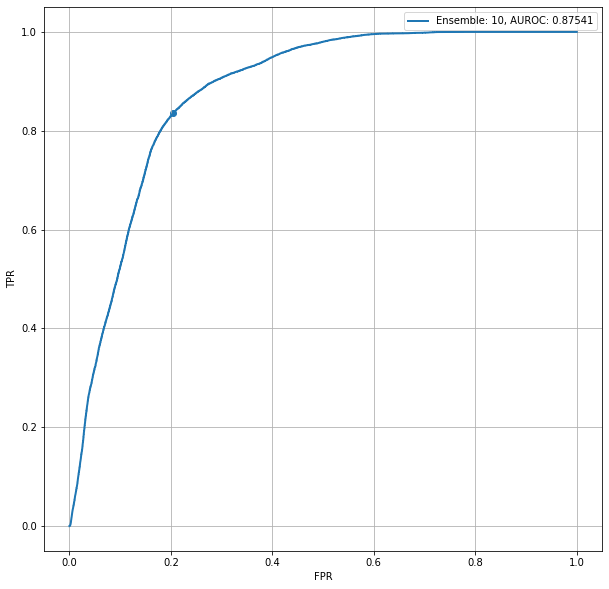

Optimal threshold:  0.3863157033920288 339534


In [5]:
auroc = main(ent_id_path, ent_ood_path, False)
plot_roc_curves(auroc, is_prob=False)

## Flipout

In [6]:
ent_id_path ='./entropies_flipout/sem3d'
ent_ood_path = './entropies_flipout/s3dis'

id_path = './max_probs_flipout/sem3d'
ood_path = './max_probs_flipout/s3dis'

### Probability score - Flipout

10
./max_probs_flipout/sem3d/10
0.1878662109375
./max_probs_flipout/s3dis/10
Max Geo-means score:  0.7427306140800576


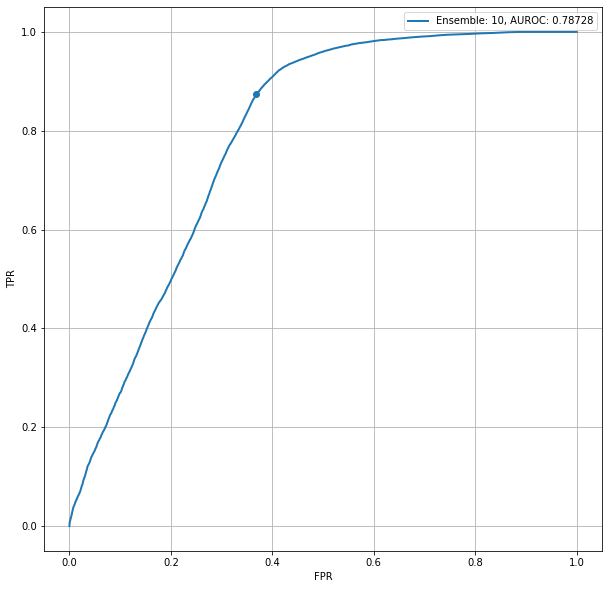

Optimal threshold:  0.716796875 1911


In [7]:
auroc = main(id_path, ood_path)
plot_roc_curves(auroc)

### Entropy score - Flipout

10
./entropies_flipout/sem3d/10
1.245737075805664e-05
./entropies_flipout/s3dis/10
Max Geo-means score:  0.7387632253331841


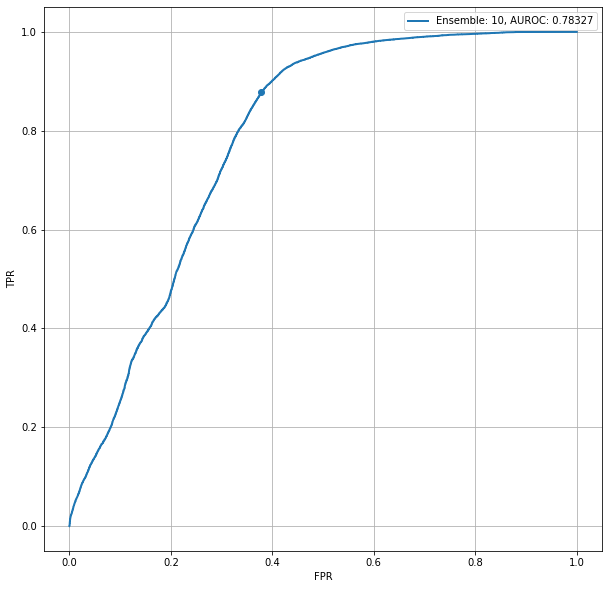

Optimal threshold:  0.438823938369751 442877


In [8]:
auroc = main(ent_id_path, ent_ood_path, False)
plot_roc_curves(auroc, is_prob=False)

## Dropout

In [9]:
id, ood = [], []
ent_id_path ='./entropies_dropout/sem3d'
ent_ood_path = './entropies_dropout/s3dis'

id_path = './max_probs_dropout/sem3d'
ood_path = './max_probs_dropout/s3dis'

### Probability score - Dropout

10
./max_probs_dropout/sem3d/10
0.1717529296875
./max_probs_dropout/s3dis/10
Max Geo-means score:  0.5802664823158004


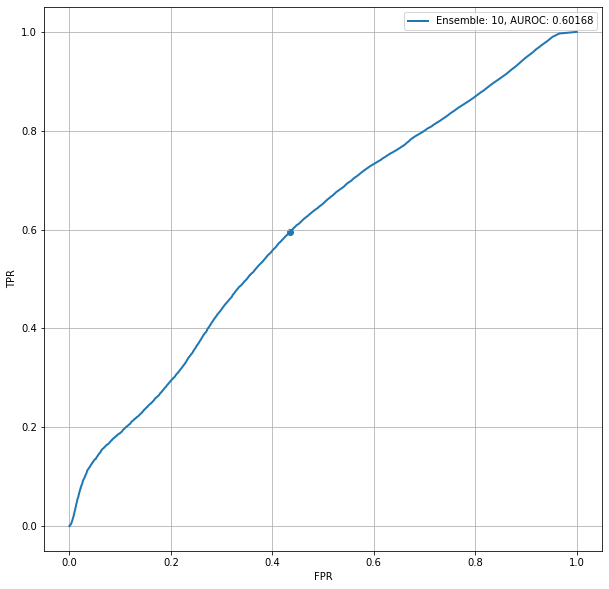

Optimal threshold:  0.7716064453125 2207


In [10]:
auroc = main(id_path, ood_path)
plot_roc_curves(auroc)

10
./entropies_dropout/sem3d/10
1.0669231414794922e-05
./entropies_dropout/s3dis/10
Max Geo-means score:  0.5668250185507012


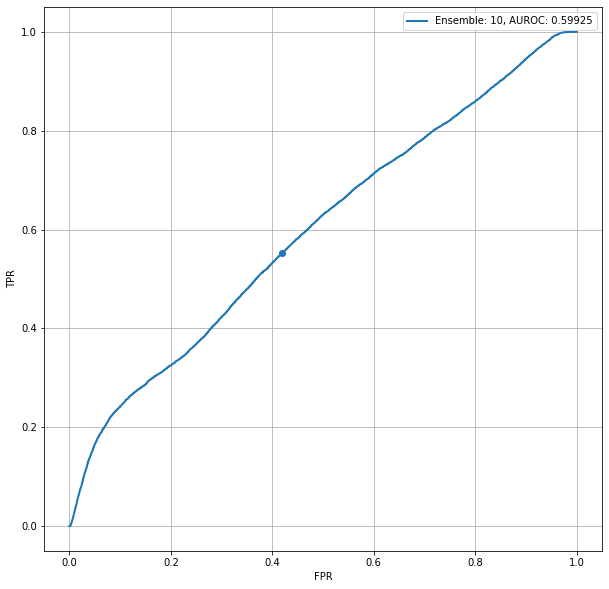

Optimal threshold:  0.4115316867828369 378977


In [11]:
auroc = main(ent_id_path, ent_ood_path, False)
plot_roc_curves(auroc, is_prob=False)

# Semantic3D vs Semantic3D without color

In [12]:
ent_id_path ='./entropy_val/entropies/sem3d'
ent_ood_path = './entropy_val/sem3d_of'

id_path = './sem3d'
ood_path = './sem3d_of'

10
./sem3d/10
0.1744384765625
./sem3d_of/10
Max Geo-means score:  0.7434253811187268


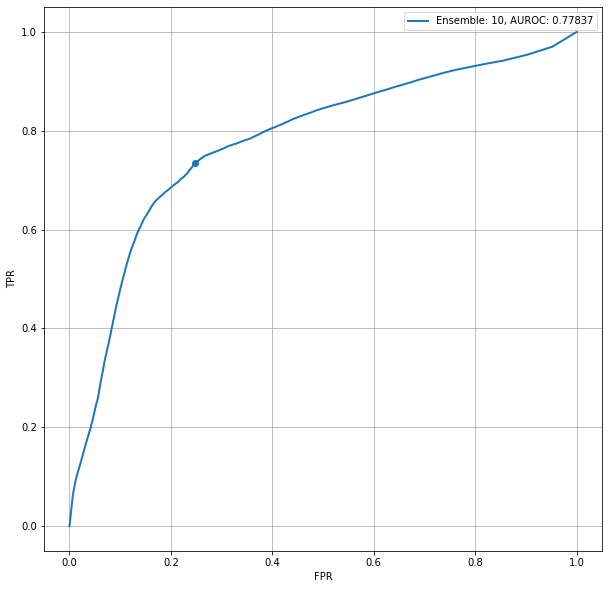

Optimal threshold:  0.7901611328125 2373


In [13]:
auroc = main(id_path, ood_path)
plot_roc_curves(auroc)

10
./entropy_val/entropies/sem3d/10
1.1563301086425781e-05
./entropy_val/sem3d_of/10
Max Geo-means score:  0.7397757512256866


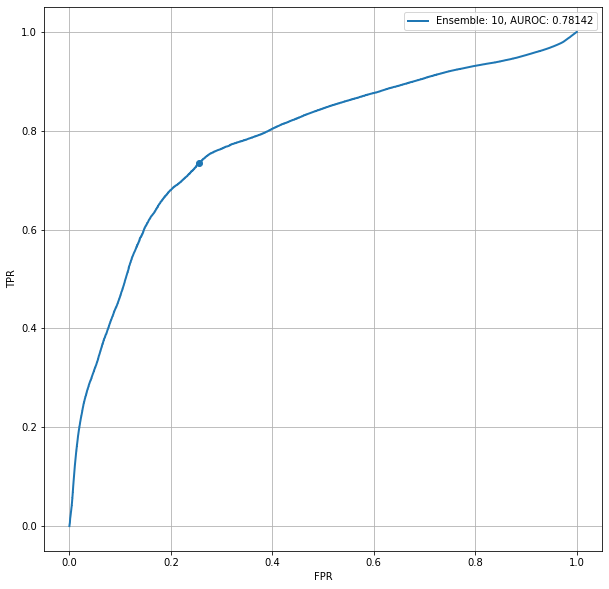

Optimal threshold:  0.3228421211242676 864527


In [14]:
auroc = main(ent_id_path, ent_ood_path, False)
plot_roc_curves(auroc, is_prob=False)

### Flipout

In [15]:
ent_id_path ='./entropies_flipout/sem3d'
ent_ood_path = './entropies_flipout/sem3d_of'

id_path = './max_probs_flipout/sem3d'
ood_path = './max_probs_flipout/sem3d_of'

10
./max_probs_flipout/sem3d/10
0.1878662109375
./max_probs_flipout/sem3d_of/10
Max Geo-means score:  0.6349963892212114


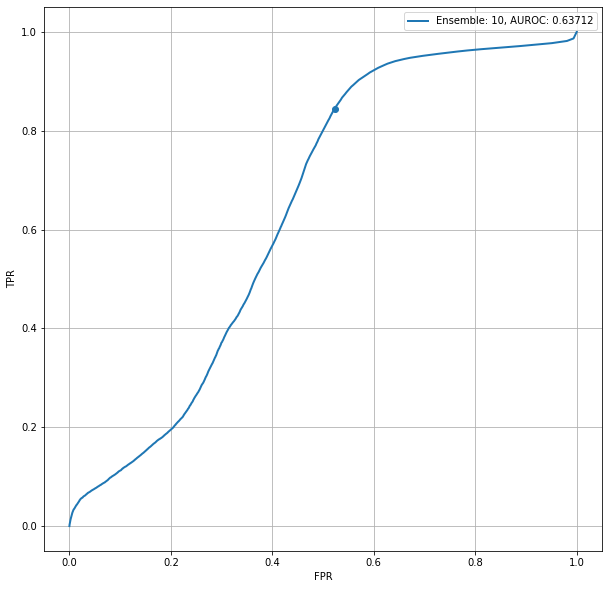

Optimal threshold:  0.796142578125 2369


In [16]:
auroc = main(id_path, ood_path)
plot_roc_curves(auroc)

10
./entropies_flipout/sem3d/10
1.245737075805664e-05
./entropies_flipout/sem3d_of/10
Max Geo-means score:  0.6361109360919914


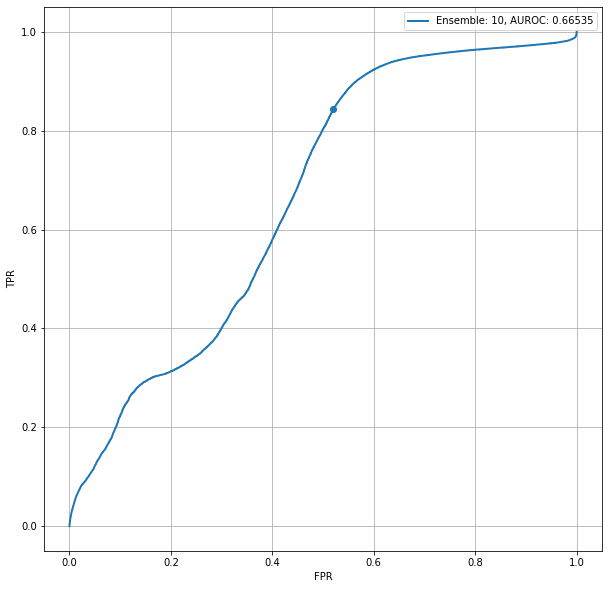

Optimal threshold:  0.13073641061782837 1468641


In [17]:
auroc = main(ent_id_path, ent_ood_path, False)
plot_roc_curves(auroc, is_prob=False)

## Dropout

In [18]:
ent_id_path ='./entropies_dropout/sem3d'
ent_ood_path = './entropies_dropout/sem3d_of'

id_path = './max_probs_dropout/sem3d'
ood_path = './max_probs_dropout/sem3d_of'

In [19]:
auroc = main(id_path, ood_path)
plot_roc_curves(auroc)

10
./max_probs_dropout/sem3d/10
0.1717529296875
./max_probs_dropout/sem3d_of/10


KeyboardInterrupt: 

In [ ]:
auroc = main(ent_id_path, ent_ood_path, False)
plot_roc_curves(auroc, is_prob=False)